# Text Classification

Text Classification is a useful technique in several applications of NLP such as:
- Topic Identification
- Text Summarization
- Sentiment Analysis

In this notebook the Text Classification is demonstrated with the ``News-Category Classification``.<br> With a dataset of roughly 200,000 categorized news aricles from Huffington Post we can train our classificaton model.

## Preparations

**note:**<br>
 make sure that you use an GPU for that operation.
To train the model will take several time and with a GPU you can fasten that task. 

In [ ]:
# Note: after installing simpletransformers, one must restart the runtime

!pip install simpletransformers

To download a dataset from [kaggle.com](www.kaggle.com), one must sign up for an account first.<br><br>
Here, there are 2 ways shown, how to load the data set into colab:
- upload file from a local storage
- load dataset directly from kaggle.com

To download directly from kaggle there is an [official kaggle-api](https://github.com/Kaggle/kaggle-api) which makes the usage very easy.

Structure the colab environment for the data set from [kaggle.com](www.kaggle.com) as follows:

content/
>> kaggle/
>>> News_Category_Dataset_v2.json 


In [2]:
# Create 'kaggle' folder
!mkdir '/content/kaggle'

#### Upload data set from a local storage

In [ ]:
#from google.colab import files

#files.upload()

#### Download data set from kaggle.com via api


* Create api-token:<br>
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and 
select 'Create API Token'. This will trigger the download of kaggle.json, a file containing your API credentials. 
Place this file in the location 'root/.kaggle/kaggle.json'.

* Secure your api-token:<br>
For your security, ensure that other users of your computer do not have read access to your credentials.
On Unix-based systems you can do this with the following command:
chmod 600 ~/.kaggle/kaggle.json

In [1]:
# Prepare folders in colab environment
import os

os.mkdir('/root/.kaggle')
os.chdir('/root/.kaggle')

In [ ]:
# After downloading the api-token, bring it into colab:

from google.colab import files

files.upload()

In [6]:
# Change access of the api-token
os.chmod('/root/.kaggle/kaggle.json', 600)

# Get back to the kaggle folder
os.chdir('/content/kaggle')

In [7]:
# Download dataset
!kaggle datasets download -d rmisra/news-category-dataset

 28% 7.00M/25.4M [00:00<00:00, 71.8MB/s]
100% 25.4M/25.4M [00:00<00:00, 124MB/s] 


In [8]:
 # Unpack dataset
 
 !unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
  inflating: News_Category_Dataset_v2.json  


In [9]:
# Get back to default ('content/') location
!cd ..

## Load data set

We import all necessary libraries. Among the simpletransformers library,
we also need functions from scikit-learn (Pedregosa et al., 2011) and the Pandas
library (Reback et al., 2020) to load and extract our training text corpus from the
JSON file.
In google-colab, pandas and scikit-learn are pre-installed.
We extract our training text corpus and import it into a Pandas data frame df (line
7).

In [10]:
import pandas as pd
from simpletransformers.classification import ClassificationModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Read data from JSON
df = pd.read_json("/content/kaggle/News_Category_Dataset_v2.json", orient="records", lines=True)

Look at some of the dataset entries:

In [11]:
df.head(3)

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26


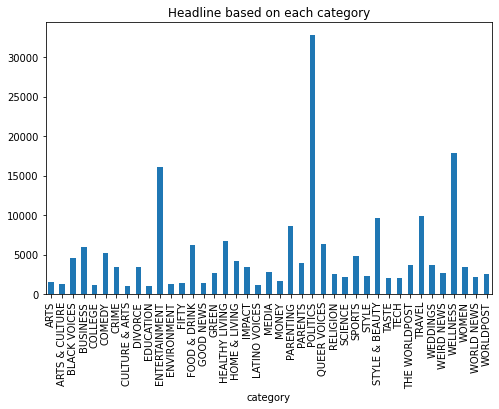

In [12]:
# Display category distribution
from matplotlib import pyplot as plt

ax = df.groupby("category").count()["headline"].plot(kind="bar", 
                                                 figsize=(8, 5),
                                                 title="Headline based on each category")
plt.show()

## Data Preparation

Because our classification model expects its input in a certain structure, we prepare
a new data frame data. This data frame has a column text that contains the
concatenated headlines and corresponding short descriptions. We create a
column labels that contains the category of the article.

In [13]:
data = pd.DataFrame()
data["text"] = df.headline + " " + df.short_description
data["labels"] = df.category

# show the new structure
data.head(3)

,text,labels
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT


The classification model needs to get only unique labels. ``lables`` lists only the unique labels from ``data``.

In [14]:
labels = list(data["labels"].unique())

Since our model accepts only numeric values for the target features (our article categories),
we need to use scikit-learn’s LabelEncoder to encode our string-based
labels (“CRIME,” “SPORTS,” “ENTERTAINMENT”) as integers

In [15]:
# Convert labels to numerical values
le = preprocessing.LabelEncoder()
le.fit(labels)
data["labels"] = le.transform(data["labels"])

We split our data set into training (80%) and evaluation set (20%) using scikit-learn’s
train_test_split function. Please note that we refrain from creating a
third set for the final evaluation to simplify this demonstration.

In [16]:
train_df, eval_df = train_test_split(data, test_size=0.2)

## Create classification model

We create our classification model. We use a model
bert_base_uncased (uncased monolingual English version of BERT published by
Google) from the “bert” model family. The number of labels (categories) is set
through the num_labels parameter.

In [17]:
# Create a classification model
model = ClassificationModel('bert', 'bert-base-uncased', 
                            num_labels=len(labels))

Downloading:   0%|          | 0.00/433 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

## Train model

We can start training our model. This automatically downloads the pre-trained
BERT model, initializes its parameters, and preprocesses our training data using a
subword tokenizer before the actual training process is started.

In [18]:
# Train the model
model.train_model(train_df)

  0%|          | 0/160682 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/20086 [00:00<?, ?it/s]

(20086, 1.991555046420357)

## Evaluation

We evaluate the model on our evaluation set.

In [19]:
# Evaluate the model
result, model_outputs, predictions = model.eval_model(eval_df)

  0%|          | 0/40171 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5022 [00:00<?, ?it/s]

In [20]:
print(result)

{'mcc': 0.4820559891200116, 'eval_loss': 1.7258759877658945}
